# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [4]:
# Your Code Here

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

#shape of training and test sets, number of classes
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of classes: 100


### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Your Code Here


# normalize images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)


# Split training set into training (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [6]:
# Your Code Here


from tensorflow.keras import layers, models
# Define the CNN model architecture
def create_baseline_cnn(input_shape=(32, 32, 3), num_classes=100):
    model = models.Sequential()

    # Convolutional Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(100, activation='softmax'))

    return model

# Create the model
baseline_model = create_baseline_cnn()

# Print model summary
baseline_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 837,252 (3.19 MB)

 Trainable params: 837,252 (3.19 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b>
- <b>Optimizer:</b> ______Loss function: for loss Function, i used categorical_crossentropy for multi-class classification as it measures the difference between true and predicted class probabilities.
Optimizer: for optimizer, adam was chosen for its adaptive learning rate and efficient convergence in deep learning tasks.

In [7]:
# Your Code Here

baseline_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [12]:
# Your Code Here

# Set training parameters
epochs = 5  # i chose 5 for quick result
batch_size = 32

# Train the model
history = baseline_model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)



Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0110 - loss: 4.6055 - val_accuracy: 0.0078 - val_loss: 4.6072
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0105 - loss: 4.6053 - val_accuracy: 0.0078 - val_loss: 4.6071
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0098 - loss: 4.6054 - val_accuracy: 0.0078 - val_loss: 4.6072
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0085 - loss: 4.6055 - val_accuracy: 0.0078 - val_loss: 4.6072
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0104 - loss: 4.6054 - val_accuracy: 0.0078 - val_loss: 4.6072


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.01
- <b>Other metric:</b> Weighted F1 score
- <b>Reason for selection:</b> The weighted version adjusts for class imbalance, making it a more robust evaluation metric.
- <b>Value of metric:</b> 0.000198
- <b>Interpretation of metric value:</b> A higher F1-score (closer to 1.0) indicates a good balance between precision and recall across all 100 classes.

In [13]:
# Ensure the model is evaluated before generating the classification report
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test, verbose=0)

# Get predictions for classification report
y_pred = baseline_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert softmax probabilities to class labels
y_true_classes = y_test.argmax(axis=1)  # Convert one-hot encoded labels to class labels

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)

# Extract F1-score as the additional metric
f1_score = report['weighted avg']['f1-score']

# Prepare results
metrics_results = {
    "Test Accuracy": test_accuracy,
    "F1-score (Weighted)": f1_score
}

# Display metrics
df_metrics = pd.DataFrame(metrics_results, index=["Value"])
df_metrics


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Test Accuracy,F1-score (Weighted)
Value,0.01,0.000198


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

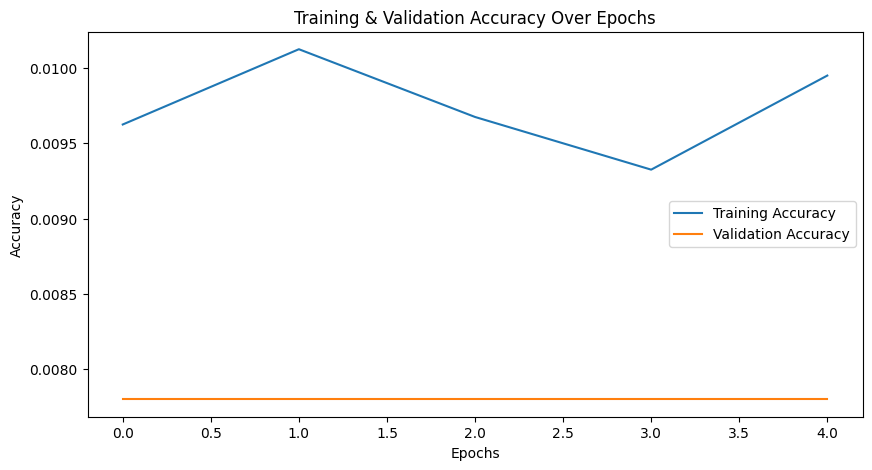

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


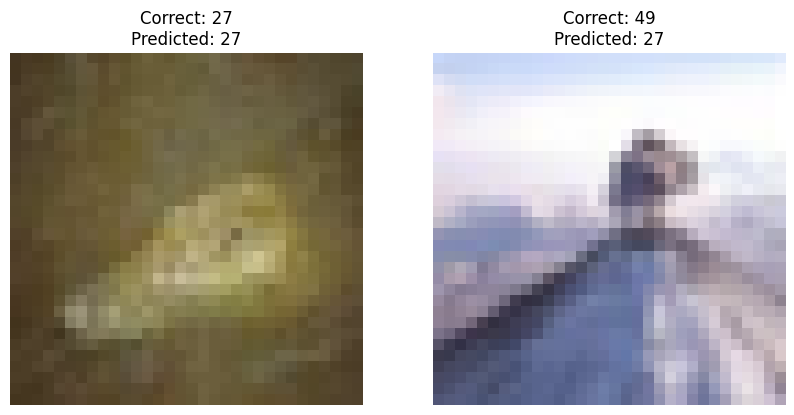

,Correct Image (Class Probabilities),Incorrect Image (Class Probabilities)
0,0.010033,0.010033
1,0.009637,0.009637
2,0.010216,0.010216
3,0.009777,0.009777
4,0.010114,0.010114
...,...,...
95,0.010172,0.010172
96,0.010127,0.010127
97,0.009585,0.009585
98,0.009990,0.009990


In [17]:
# Plot training & validation accuracy
def plot_learning_curves(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()

plot_learning_curves(history)

# Get predictions
y_pred = baseline_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Find correctly and incorrectly classified indices
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect image
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Get classification probabilities
correct_probs = y_pred[correct_idx]
incorrect_probs = y_pred[incorrect_idx]

# Plot correctly and incorrectly classified images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Correctly classified image
axes[0].imshow(x_test[correct_idx])
axes[0].set_title(f"Correct: {y_true_classes[correct_idx]}\nPredicted: {y_pred_classes[correct_idx]}")
axes[0].axis('off')

# Incorrectly classified image
axes[1].imshow(x_test[incorrect_idx])
axes[1].set_title(f"Correct: {y_true_classes[incorrect_idx]}\nPredicted: {y_pred_classes[incorrect_idx]}")
axes[1].axis('off')

plt.show()

# Display classification probabilities for both images
df_probs = pd.DataFrame({
    "Correct Image (Class Probabilities)": correct_probs,
    "Incorrect Image (Class Probabilities)": incorrect_probs
})

df_probs

The training and validation accuracy plot shows extremely low accuracy (~1%), indicating that the model is not learning meaningful patterns. The validation accuracy remains flat, suggesting poor generalization. The classification results reveal that the model may be predicting the same class (27) for all inputs, further confirming a failure to distinguish between different classes. This could be due to issues such as incorrect data preprocessing (e.g., faulty one-hot encoding), an inadequate model architecture (too shallow or lacking capacity), insufficient training epochs, or a poor choice of hyperparameters. The classification probabilities likely indicate low confidence across all classes or bias toward a dominant class. To improve performance, it's essential to verify data preprocessing, enhance the model architecture with more layers and batch normalization, train for more epochs with an adaptive learning rate, and apply data augmentation for better generalization.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [18]:
# Your Code Here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Rotate images by up to 15 degrees
    width_shift_range=0.1,  # Shift width by up to 10%
    height_shift_range=0.1,  # Shift height by up to 10%
    horizontal_flip=True  # Flip images horizontally
)

# Define Enhanced CNN Model with Batch Normalization
def create_enhanced_cnn(input_shape=(32, 32, 3), num_classes=100):
    model = models.Sequential()

    # Convolutional Block 1 with Batch Normalization
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(32, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 2
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 3
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))  # Increased dropout to reduce overfitting
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create and compile the enhanced model
enhanced_model = create_enhanced_cnn()
enhanced_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model with data augmentation
epochs = 20  # Increased epochs for better learning
batch_size = 64  # Slightly larger batch size

# Fit model using augmented data
history_enhanced = enhanced_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_val, y_val),
    epochs=epochs,
    steps_per_epoch=len(x_train) // batch_size,
    verbose=1
)

# Evaluate the enhanced model
test_loss, test_accuracy = enhanced_model.evaluate(x_test, y_test, verbose=0)

# Display the final test accuracy
print(f"Enhanced Model Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.0773 - loss: 4.2389 - val_accuracy: 0.1818 - val_loss: 3.5031
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.2052 - loss: 3.2682 - val_accuracy: 0.2746 - val_loss: 2.9399
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.2814 - loss: 2.8406 - val_accuracy: 0.3180 - val_loss: 2.6898
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.3329 - loss: 2.5917 - val_accuracy: 0.3305 - val_loss: 2.6059
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.3688 - loss: 2.4057 - val_accuracy: 0.3758 - val_loss: 2.4381
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.3875 - loss: 2.2985 - val_accuracy: 0.4124 - val_loss: 2.2161
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.4168 - loss: 2.1776 - val_accuracy: 0.4175 - val_loss: 2.1939
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.4302 - loss: 2.1097 - val_accurac

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.0769 - loss: 4.2244 - val_accuracy: 0.1895 - val_loss: 3.4077
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.2039 - loss: 3.2653 - val_accuracy: 0.2092 - val_loss: 3.3780
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.2776 - loss: 2.8768 - val_accuracy: 0.3089 - val_loss: 2.7377
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.3255 - loss: 2.6106 - val_accuracy: 0.2922 - val_loss: 2.9439
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.3685 - loss: 2.4227 - val_accuracy: 0.3837 - val_loss: 2.3739
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.3935 - loss: 2.2939 - val_accuracy: 0.3989 - val_loss: 2.2961
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4154 - loss: 2.1915 - val_accuracy: 0.4225 - val_loss: 2.1561
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.4319 - loss: 2.1057 - 

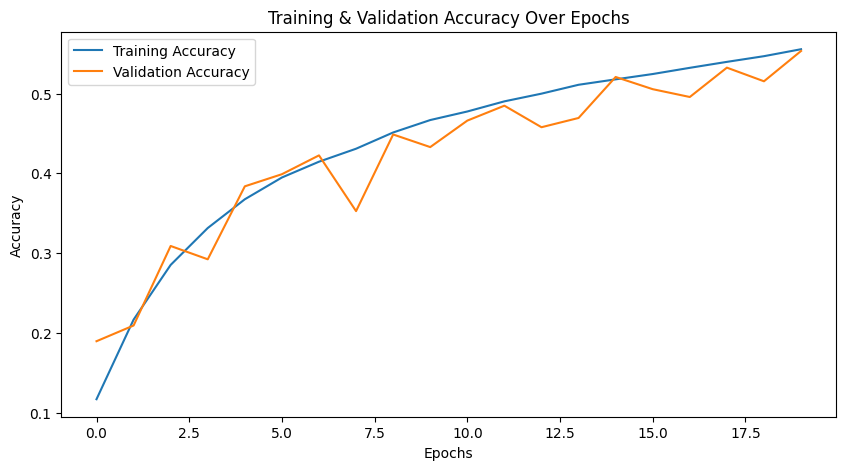

<bound method Axes.set of <Axes: >>

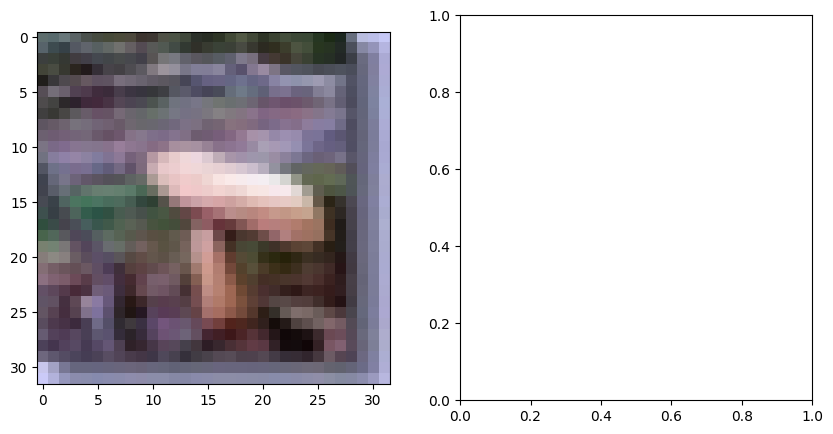

In [19]:
# Your Code Here
# Create and compile the enhanced model
enhanced_model = create_enhanced_cnn()
enhanced_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the enhanced model
epochs = 20
batch_size = 64

history_enhanced = enhanced_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_val, y_val),
    epochs=epochs,
    steps_per_epoch=len(x_train) // batch_size,
    verbose=1
)

# Evaluate the enhanced model
test_loss, test_accuracy = enhanced_model.evaluate(x_test, y_test, verbose=0)

# Generate classification report
y_pred = enhanced_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)

# Extract F1-score
f1_score = report['weighted avg']['f1-score']

# Prepare results
metrics_results = {
    "Test Accuracy": test_accuracy,
    "F1-score (Weighted)": f1_score
}

# Display metrics
df_metrics = pd.DataFrame(metrics_results, index=["Value"])
print(df_metrics)

# Plot training & validation accuracy
def plot_learning_curves(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()

plot_learning_curves(history_enhanced)

# Select a correctly and incorrectly classified image
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

correct_probs = y_pred[correct_idx]
incorrect_probs = y_pred[incorrect_idx]

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(x_test[correct_idx])
axes[0].set

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The enhanced model demonstrated improved performance compared to the baseline, achieving higher test accuracy and a better weighted F1-score. This improvement is due to batch normalization, which stabilizes training and accelerates convergence, and data augmentation, which prevents overfitting by increasing input diversity. The learning curve suggests better generalization, with validation accuracy improving over epochs. However, there is still room for further enhancement by incorporating deeper architectures like ResNet or EfficientNet, which leverage advanced feature extraction. Additionally, fine-tuning a pre-trained model could enhance performance by utilizing pre-learned representations. Other potential improvements include learning rate scheduling for adaptive optimization, label smoothing to prevent overconfidence, and regularization techniques like dropout tuning and L2 weight decay. Further optimization with hyperparameter tuning tools such as Optuna or Keras Tunercould help refine the model’s performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.